In [1]:
import cv2 
from matplotlib import pyplot as plt 
import numpy as np

img= cv2.imread('./Cat_dataset/test_img/cacilo.jpg')

gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalcatface.xml')

faces = face_cascade.detectMultiScale(gray,1.3,5)
print(faces)
print(type(faces))

(x,y,w,h) = faces[0]
#generates array based on the image provided_______________________________


[[ 86  24 178 178]]
<class 'numpy.ndarray'>


In [2]:
import numpy as np 
#checks for objects that are potentially a cat, then detects for presence of a cat face using a haar cascade, 
#if a cat is present the catbody is cropped which was initially detected using a pretained ssd_mobilenet_v3 model


def get_cropped_image(file_path = None):
    
    img = cv2.imread(file_path)
    #configuring pretrained model for cat detection 
    config = './ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
    frozen_model = './frozen_inference_graph.pb'
    model = cv2.dnn_DetectionModel(frozen_model,config)
    global classLabels 
    classLabels = []
    
    file_name = './pretrained_labels.txt'
    
    with open(file_name,'rt') as fpt:
        classLabels = fpt.read().rstrip('\n').split('\n')
        classLabels.append(fpt.read())
    
    
    model.setInputSize(320,320)
    model.setInputScale(1.0/127.5)
    model.setInputMean((127.5,127.5,127.5))
    model.setInputSwapRB(True)


    cropped_faces = []
    

    
    #detecting any object present using pretrained model 
    if img is not None:
        ClassIndex , confidence , bbox = model.detect(img,confThreshold = 0.5)
        face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalcatface.xml')

        #box of object and cropping image if a cat face is present in it
        for x,y,w,h in bbox:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            plt.imshow(roi_color)
            cropped_faces.append(roi_color)
            face = face_cascade.detectMultiScale(roi_gray)
            if len(face) >= 1:
                return roi_color
            


        


In [2]:
path_to_dir = './Cat_dataset/images/'
path_to_cr_data = './Cat_dataset/_cropped/'

In [3]:
import os
img_dirs = []
for entry in os.scandir(path_to_dir):
    if entry.is_dir():
        img_dirs.append(entry.path)
    

In [4]:
img_dirs

['./Cat_dataset/images/Abyssinian',
 './Cat_dataset/images/American Bobtail',
 './Cat_dataset/images/American Curl',
 './Cat_dataset/images/American Shorthair',
 './Cat_dataset/images/American Wirehair',
 './Cat_dataset/images/Applehead Siamese',
 './Cat_dataset/images/Balinese',
 './Cat_dataset/images/Bengal',
 './Cat_dataset/images/Birman',
 './Cat_dataset/images/Bombay',
 './Cat_dataset/images/British Shorthair',
 './Cat_dataset/images/Burmese',
 './Cat_dataset/images/Burmilla',
 './Cat_dataset/images/Calico',
 './Cat_dataset/images/Canadian Hairless',
 './Cat_dataset/images/Chartreux',
 './Cat_dataset/images/Chausie',
 './Cat_dataset/images/Chinchilla',
 './Cat_dataset/images/Cornish Rex',
 './Cat_dataset/images/Cymric',
 './Cat_dataset/images/Devon Rex',
 './Cat_dataset/images/Dilute Calico',
 './Cat_dataset/images/Dilute Tortoiseshell',
 './Cat_dataset/images/Domestic Long Hair',
 './Cat_dataset/images/Domestic Medium Hair',
 './Cat_dataset/images/Domestic Short Hair',
 './Cat_da

In [8]:
#import shutil 
#if os.path.exists(path_to_cr_data):
#    shutil.rmtree(path_to_cr_data)
#os.mkdir(path_to_cr_data)


In [5]:
cat_name = []
for item in img_dirs:
    cat_name.append(item.split('/')[-1])    

Abyssinian
making folder:  ./Cat_dataset/_cropped/Abyssinian
American Bobtail
making folder:  ./Cat_dataset/_cropped/American Bobtail
American Curl
making folder:  ./Cat_dataset/_cropped/American Curl
American Shorthair
making folder:  ./Cat_dataset/_cropped/American Shorthair
American Wirehair
making folder:  ./Cat_dataset/_cropped/American Wirehair
Applehead Siamese
making folder:  ./Cat_dataset/_cropped/Applehead Siamese
Balinese
making folder:  ./Cat_dataset/_cropped/Balinese
Bengal
making folder:  ./Cat_dataset/_cropped/Bengal
Birman
making folder:  ./Cat_dataset/_cropped/Birman
Bombay
making folder:  ./Cat_dataset/_cropped/Bombay
British Shorthair
making folder:  ./Cat_dataset/_cropped/British Shorthair
Burmese
making folder:  ./Cat_dataset/_cropped/Burmese
Burmilla
making folder:  ./Cat_dataset/_cropped/Burmilla
Calico
making folder:  ./Cat_dataset/_cropped/Calico
Canadian Hairless
making folder:  ./Cat_dataset/_cropped/Canadian Hairless
Chartreux
making folder:  ./Cat_dataset/_

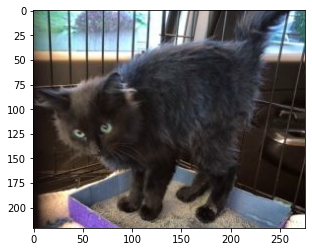

In [10]:
cropped_image_dirs = []
file_name_dict = {}
global path_to_dir
#for img_dir in img_dirs:
    count = 1
    cat_name = img_dir.split('/')[-1]
    print(cat_name)
    
    file_name_dict[cat_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data+cat_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print('making folder: ',cropped_folder)
        
            cropped_file_name = cat_name+str(count) + '.jpg'
            cropped_file_path = cropped_folder+"/" + cropped_file_name
            cv2.imwrite(cropped_file_path,roi_color)
            file_name_dict[cat_name].append(cropped_file_path)
            count = count + 1

In [6]:
#Fetches path of each and every cat photo in the main cropped photo directory
path_to_cropped = './Cat_dataset/_cropped/'
cropped_image_dirs = []

for entry in os.scandir(path_to_cropped):
    if entry.is_dir():
        cropped_image_dirs.append(entry.path)

file_name_dict = {}
for img_dir in cropped_image_dirs:
    cat_name = img_dir.split('/')[-1]
    file_name_dict[cat_name] = []
    for entry in os.scandir(img_dir):
        file_name_dict[cat_name].append(entry.path)

        
file_name_dict     


ed/Tortoiseshell\\Tortoiseshell13.jpg',
  './Cat_dataset/_cropped/Tortoiseshell\\Tortoiseshell14.jpg',
  './Cat_dataset/_cropped/Tortoiseshell\\Tortoiseshell15.jpg',
  './Cat_dataset/_cropped/Tortoiseshell\\Tortoiseshell16.jpg',
  './Cat_dataset/_cropped/Tortoiseshell\\Tortoiseshell17.jpg',
  './Cat_dataset/_cropped/Tortoiseshell\\Tortoiseshell18.jpg',
  './Cat_dataset/_cropped/Tortoiseshell\\Tortoiseshell19.jpg',
  './Cat_dataset/_cropped/Tortoiseshell\\Tortoiseshell2.jpg',
  './Cat_dataset/_cropped/Tortoiseshell\\Tortoiseshell20.jpg',
  './Cat_dataset/_cropped/Tortoiseshell\\Tortoiseshell21.jpg',
  './Cat_dataset/_cropped/Tortoiseshell\\Tortoiseshell22.jpg',
  './Cat_dataset/_cropped/Tortoiseshell\\Tortoiseshell23.jpg',
  './Cat_dataset/_cropped/Tortoiseshell\\Tortoiseshell24.jpg',
  './Cat_dataset/_cropped/Tortoiseshell\\Tortoiseshell25.jpg',
  './Cat_dataset/_cropped/Tortoiseshell\\Tortoiseshell26.jpg',
  './Cat_dataset/_cropped/Tortoiseshell\\Tortoiseshell27.jpg',
  './Cat_dataset

# #model making brrrrrrrrr

In [7]:
#making dictionary of the different cat breeds then assigning a integer value for identification
class_dict = {}
count = 0
for cat_name in file_name_dict.keys():
    class_dict[cat_name] = count
    count = count + 1
class_dict

{'Abyssinian': 0,
 'American Bobtail': 1,
 'American Curl': 2,
 'American Shorthair': 3,
 'Applehead Siamese': 4,
 'Balinese': 5,
 'Bengal': 6,
 'Birman': 7,
 'Bombay': 8,
 'British Shorthair': 9,
 'Burmese': 10,
 'Calico': 11,
 'Chartreux': 12,
 'Cornish Rex': 13,
 'Devon Rex': 14,
 'Dilute Calico': 15,
 'Dilute Tortoiseshell': 16,
 'Domestic Long Hair': 17,
 'Domestic Medium Hair': 18,
 'Domestic Short Hair': 19,
 'Egyptian Mau': 20,
 'Exotic Shorthair': 21,
 'Extra-Toes Cat - Hemingway Polydactyl': 22,
 'Havana': 23,
 'Himalayan': 24,
 'Japanese Bobtail': 25,
 'Maine Coon': 26,
 'Manx': 27,
 'Munchkin': 28,
 'Nebelung': 29,
 'Norwegian Forest Cat': 30,
 'Ocicat': 31,
 'Oriental Short Hair': 32,
 'Oriental Tabby': 33,
 'Persian': 34,
 'Pixiebob': 35,
 'Ragamuffin': 36,
 'Ragdoll': 37,
 'Russian Blue': 38,
 'Scottish Fold': 39,
 'Siamese': 40,
 'Siberian': 41,
 'Silver': 42,
 'Snowshoe': 43,
 'Sphynx - Hairless Cat': 44,
 'Tabby': 45,
 'Tiger': 46,
 'Tonkinese': 47,
 'Torbie': 48,
 'T

In [8]:
import json
with open('class_dictionary.json','w') as f:
    f.write(json.dumps(class_dict))

In [9]:
#making X and Y for training the neural network
X,y = [],[]

for cat_name,training_files in file_name_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scaled_raw_img = cv2.resize(img,(32,32))
        #img_har = w2d(img,'db1',5)
        #scaled_img_har = cv2.resize(img_har,(32,32))
        #combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        #print(scaled_raw_img.shape)
        X.append(scaled_raw_img)
        y.append(class_dict[cat_name])
        

    

In [10]:
print(len(X[0]))
y = np.array(y)
print(y)
y.shape
X = np.array(X)
X.shape

32
[ 0  0  0 ... 52 52 52]


(4357, 32, 32, 3)

In [12]:
#X = np.array(X).reshape(len(X),4096).astype(float)
#X.shape

(4521, 4096)

In [11]:
#training deep learning model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)

In [12]:
#normalizing data 
X_train = X_train/255.0
X_test = X_test/255.0
print(X_train.shape)


#X_train = X_train.reshape(-1,)
#X_test = X_test.reshape(-1,)

(3267, 32, 32, 3)


In [13]:
#making my cnn 
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
def cnn():
    cnn = models.Sequential([
        layers.Conv2D(filters = 32,kernel_size=(3,3),activation = 'relu',input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(filters = 64,kernel_size = (3,3),activation = 'relu'),
        layers.MaxPooling2D((2,2)),


        layers.Flatten(),
        layers.Dense(64,activation='relu'),
        layers.Dense(65,activation='softmax')
    ])
    cnn.compile(optimizer = 'adam',
                 loss = 'sparse_categorical_crossentropy',
                 metrics = ['accuracy'])
    return cnn

In [106]:
#cnn.compile(optimizer = 'adam',
#             loss = 'sparse_categorical_crossentropy',
#             metrics = ['accuracy'])

In [14]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [15]:
with tf.device('/GPU:0'):
    checkpoint_path = './training1/cp.ckpt'
    cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,save_weights_only=True,verbose=1)
    model = cnn()
    model.fit(X_train,y_train,epochs = 90)
    

Epoch 1/90
103/103 [==============================] - 12s 7ms/step - loss: 4.0731 - accuracy: 0.0291

Epoch 00001: saving model to ./training1\cp.ckpt
Epoch 2/90
103/103 [==============================] - 1s 6ms/step - loss: 3.9395 - accuracy: 0.0318: 0s - loss: 3.9595 - accu

Epoch 00002: saving model to ./training1\cp.ckpt
Epoch 3/90
103/103 [==============================] - 1s 6ms/step - loss: 3.8831 - accuracy: 0.0432

Epoch 00003: saving model to ./training1\cp.ckpt
Epoch 4/90
103/103 [==============================] - 1s 5ms/step - loss: 3.8115 - accuracy: 0.0585

Epoch 00004: saving model to ./training1\cp.ckpt
Epoch 5/90
103/103 [==============================] - 1s 6ms/step - loss: 3.7129 - accuracy: 0.0707

Epoch 00005: saving model to ./training1\cp.ckpt
Epoch 6/90
103/103 [==============================] - 1s 5ms/step - loss: 3.6270 - accuracy: 0.0860

Epoch 00006: saving model to ./training1\cp.ckpt
Epoch 7/90
103/103 [==============================] - 1s 5ms/step - loss:

Epoch 55/90
103/103 [==============================] - 1s 6ms/step - loss: 0.0068 - accuracy: 1.0000

Epoch 00055: saving model to ./training1\cp.ckpt
Epoch 56/90
103/103 [==============================] - 1s 5ms/step - loss: 0.0062 - accuracy: 1.0000

Epoch 00056: saving model to ./training1\cp.ckpt
Epoch 57/90
103/103 [==============================] - 1s 5ms/step - loss: 0.0057 - accuracy: 1.0000

Epoch 00057: saving model to ./training1\cp.ckpt
Epoch 58/90
103/103 [==============================] - 1s 5ms/step - loss: 0.0052 - accuracy: 1.0000

Epoch 00058: saving model to ./training1\cp.ckpt
Epoch 59/90
103/103 [==============================] - 1s 5ms/step - loss: 0.0048 - accuracy: 1.0000

Epoch 00059: saving model to ./training1\cp.ckpt
Epoch 60/90
103/103 [==============================] - 1s 5ms/step - loss: 0.0044 - accuracy: 1.0000

Epoch 00060: saving model to ./training1\cp.ckpt
Epoch 61/90
103/103 [==============================] - 1s 5ms/step - loss: 0.0040 - accuracy: 

In [40]:
checkpoint_path = 'training1/cp.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,save_weights_only=True,verbose=1)


In [16]:
model.evaluate(X_test,y_test)

35/35 [==============================] - 0s 6ms/step - loss: 20.8275 - accuracy: 0.0817


[20.827491760253906, 0.08165137469768524]

In [17]:
y_pred = model.predict(X_test)

In [18]:
#model.predict(X_test[0])
o = X_test[0]
o2 = [o]
o = np.array(o)
o.shape
v = o.reshape(-1,32,32,3)
v.shape
vpred = model.predict(v)
vpred = [np.argmax(element) for element in vpred]
vpred
#TESTING____

[43]

In [75]:
np.argmax(y_pred[2])
ypred = []
for i in range(0,len(y_pred)):
    ypred.append(np.argmax(y_pred[i]))
ypred

[41,
 1,
 39,
 40,
 50,
 10,
 27,
 11,
 52,
 15,
 48,
 22,
 5,
 50,
 7,
 31,
 40,
 45,
 11,
 17,
 32,
 35,
 39,
 26,
 17,
 11,
 37,
 5,
 11,
 41,
 17,
 11,
 36,
 48,
 0,
 17,
 0,
 3,
 28,
 33,
 38,
 24,
 36,
 15,
 19,
 25,
 43,
 9,
 17,
 51,
 37,
 43,
 14,
 14,
 39,
 51,
 49,
 19,
 20,
 13,
 35,
 40,
 36,
 15,
 48,
 15,
 9,
 46,
 52,
 27,
 30,
 46,
 15,
 36,
 9,
 52,
 9,
 41,
 31,
 31,
 50,
 21,
 15,
 15,
 32,
 31,
 5,
 14,
 39,
 1,
 11,
 45,
 16,
 32,
 32,
 31,
 48,
 51,
 52,
 5,
 9,
 46,
 15,
 11,
 20,
 44,
 43,
 9,
 11,
 31,
 23,
 4,
 20,
 24,
 17,
 15,
 40,
 15,
 1,
 7,
 48,
 45,
 17,
 40,
 30,
 15,
 41,
 7,
 52,
 18,
 15,
 5,
 7,
 15,
 34,
 6,
 19,
 30,
 27,
 41,
 19,
 11,
 43,
 41,
 37,
 45,
 51,
 30,
 51,
 9,
 4,
 10,
 14,
 39,
 45,
 48,
 34,
 6,
 30,
 9,
 11,
 27,
 1,
 35,
 17,
 2,
 33,
 44,
 15,
 9,
 41,
 42,
 42,
 40,
 3,
 3,
 42,
 42,
 48,
 17,
 37,
 19,
 0,
 48,
 23,
 10,
 2,
 28,
 41,
 14,
 39,
 24,
 19,
 39,
 23,
 52,
 39,
 18,
 27,
 48,
 11,
 2,
 4,
 46,
 52,
 20,
 30,
 

Text(69.0, 0.5, 'truth')

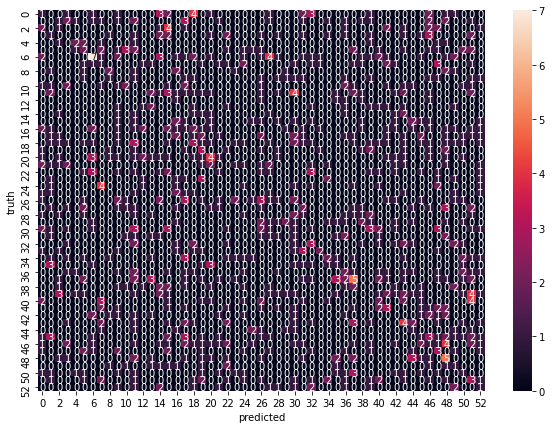

In [22]:
#Failed attempt at making a cool heatmap from confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,ypred)

import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

In [20]:
import keras
model_2 = keras.models.load_model('model.h5')

In [21]:
pred_ = model_2.predict(v)
pred_ = [np.argmax(element) for element in pred_]
pred_

[43]

In [23]:
model_2.evaluate(X_test,y_test)

35/35 [==============================] - 6s 4ms/step - loss: 20.8275 - accuracy: 0.0817


[20.827491760253906, 0.08165137469768524]

In [77]:
model_2.load_weights(checkpoint_path)

In [92]:
#model_2.predict()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]], dtype=float32)

In [83]:
model.save_weights('./CNN_weights')

In [19]:
model.save('./model.h5')

In [65]:
y_test.shape
#model_2.predict()

(1090,)